In [0]:
import tensorflow.compat.v1 as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

3


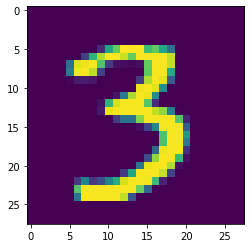

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 10000
print(y_train[image_index])
plt.imshow(x_train[image_index])


In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [55]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=8)

Epoch 1/8
60000/60000 [==============================] - 38s 638us/step - loss: 0.2095 - acc: 0.9360
Epoch 2/8
60000/60000 [==============================] - 38s 625us/step - loss: 0.0883 - acc: 0.9728
Epoch 3/8
60000/60000 [==============================] - 38s 630us/step - loss: 0.0611 - acc: 0.9799
Epoch 4/8
60000/60000 [==============================] - 38s 637us/step - loss: 0.0460 - acc: 0.9857
Epoch 5/8
60000/60000 [==============================] - 37s 621us/step - loss: 0.0379 - acc: 0.9877
Epoch 6/8
60000/60000 [==============================] - 38s 628us/step - loss: 0.0315 - acc: 0.9893
Epoch 7/8
60000/60000 [==============================] - 37s 621us/step - loss: 0.0265 - acc: 0.9912
Epoch 8/8
60000/60000 [==============================] - 38s 626us/step - loss: 0.0222 - acc: 0.9925


In [56]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 208us/step


[0.060785615129268264, 0.9835]

6


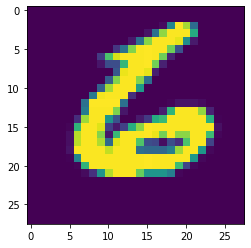

In [57]:
image_index = 9999
plt.imshow(x_test[image_index].reshape(28, 28))
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())